# $\fbox{1-3}$ 発生率の信頼区間

## 死亡率の信頼区間

In [1]:
# グラフを移動拡大縮小したい場合
# %matplotlib notebook
# グラフをインラインで表示
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

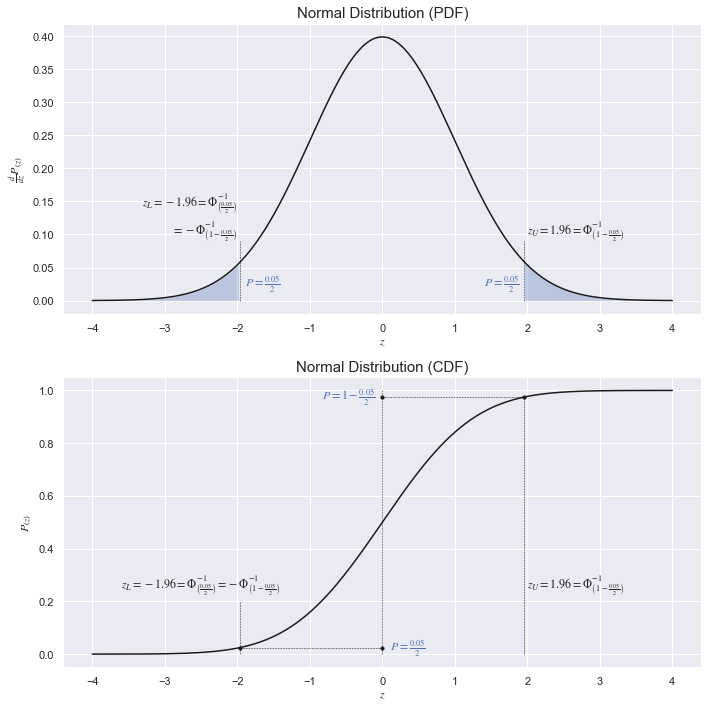

In [2]:
# 正規分布のパーセント点の概念図
import seaborn as sns

sns.set()

fig = plt.figure(figsize=(10, 10))

# ----------------------------------------------
# 確率密度関数 PDF: Probability Density Function
# ----------------------------------------------
ax1 = fig.add_subplot(211)
x = np.arange(-400, 401) / 100  # [-4, -3.99, ..., 3.99, 4]
y = norm.pdf(x)
ax1.plot(x, y, c='k')

# --------------
# 下側 2.5% 領域
# --------------
x = np.arange(-400, -197) / 100  # [-4, -3.99, ..., -1.97, -1.96]
y = norm.pdf(x)
ax1.fill_between(x, 0, y, facecolor='b', alpha=0.3)
# 点線
x = [-1.96, -1.96]
y = [0, 0.09]
ax1.plot(x, y, c='k', ls='--', lw=0.5)
# テキスト
t = r'$P=\frac{0.05}{2}$'
ax1.text(-1.9, 0.025, t, ha='left', va='center', color='b')
t = r'$z_L = -1.96 = \Phi^{-1}_{\left(\frac{0.05}{2} \right)}$' + '\n' \
    + r'$= - \Phi^{-1}_{\left(1-\frac{0.05}{2} \right)}$'
ax1.text(-2, 0.1, t, ha='right')

# --------------
# 上側 2.5% 領域
# --------------
x = np.arange(196, 400) / 100  # [1.96, 1.97, ..., 3.99, 4]
y = norm.pdf(x)
ax1.fill_between(x, 0, y, facecolor='b', alpha=0.3)
# 点線
x = [1.96, 1.96]
y = [0, 0.09]
ax1.plot(x, y, c='k', ls='--', lw=0.5)
# テキスト
t = r'$P=\frac{0.05}{2}$'
ax1.text(1.9, 0.025, t, ha='right', va='center', color='b')
t = r'$z_U = 1.96 = \Phi^{-1}_{\left(1-\frac{0.05}{2} \right)}$'
ax1.text(2, 0.1, t)
ax1.set_xlabel(r'$z$')
ax1.set_ylabel(r'$\frac{d}{dz}P_{(z)}$')
ax1.set_title('Normal Distribution (PDF)', fontsize=15)

# ---------------------------------------------
# 累積分布関数 CDF: Cumulative Density Function
# ---------------------------------------------
ax2 = fig.add_subplot(212, sharex=ax1)
x = np.arange(-400, 401) / 100  # [-4, -3.99, ..., 3.99, 4]
y = norm.cdf(x)
ax2.plot(x, y, c='k')
# 下側 2.5% 点 & 上側 2.5% 点
x = [-1.96, 0, 0, 1.96]
y = [0.025, 0.025, 0.975, 0.975]
ax2.scatter(x, y, color='k', s=10)
# y 軸
x = [0, 0]
y = [0, 1]
ax2.plot(x, y, c='k', lw=0.5, ls='--')

# ------------
# 下側 2.5% 点
# ------------
# 横点線
x = [-1.96, 0]
y = [0.025, 0.025]
ax2.plot(x, y, c='k', lw=0.5, ls='--')
# 縦点線
x = [-1.96, -1.96]
y = [0, 0.2]
ax2.plot(x, y, c='k', lw=0.5, ls='--')
# テキスト
t = r'$P=\frac{0.05}{2}$'
ax2.text(0.1, 0.025, t, ha='left', va='center', color='b')

t = r'$z_L = -1.96 = \Phi^{-1}_{\left(\frac{0.05}{2} \right)}$' \
    + r'$= - \Phi^{-1}_{\left(1-\frac{0.05}{2} \right)}$'
ax2.text(-2.5, 0.25, t, ha='center')

# ------------
# 上側 2.5% 点
# ------------
# 横点線
x = [1.96, 0]
y = [0.975, 0.975]
ax2.plot(x, y, c='k', lw=0.5, ls='--')
# 縦点線
x = [1.96, 1.96]
y = [0, 0.975]
ax2.plot(x, y, c='k', lw=0.5, ls='--')
# テキスト
t = r'$P=1-\frac{0.05}{2}$'
ax2.text(-0.1, 0.975, t, ha='right', va='center', color='b')

t = r'$z_U = 1.96 = \Phi^{-1}_{\left(1-\frac{0.05}{2} \right)}$'
ax2.text(2, 0.25, t)

ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'$P_{(z)}$')
ax2.set_title('Normal Distribution (CDF)', fontsize=15)

fig.tight_layout()

### 信頼区間の近似計算

### 信頼区間のより精緻な計算

## 死亡率と必要なエクスポージャの関係

In [3]:
df_mortality = pd.read_csv('./public_stats/processed/ipss_mortality.csv')
df_mortality.head()

,alb,F,M
0,0,0.000098,0.000097
1,1,0.000020,0.000022
2,2,0.000011,0.000013
3,3,0.000008,0.000010
4,4,0.000007,0.000008


In [4]:
# mmort: Monthly MORTality
df_mortality[(40 <= df_mortality['alb']) & (df_mortality['alb'] < 45)]

,alb,F,M
40,40,0.000052,0.000086
41,41,0.000061,0.000095
42,42,0.000064,0.000105
43,43,0.000067,0.000113
44,44,0.000074,0.000123


In [5]:
# 精緻な信頼区間、下限 (Lower Confidence Limit)
def calc_LCL(l, d, e):
    # 正規分布の累積分布関数の逆関数
    z = norm.ppf(1 - e / 2)
    delta = z**2 * (d + z**2 / 4 - d**2 / l)
    return (d + z**2 / 2 - delta**(0.5)) / (l + z**2)

# 精緻な信頼区間、上限 (Upper Confidence Limit)
def calc_UCL(l, d, e):
    from scipy.stats import norm
    z = norm.ppf(1 - e / 2)
    delta = z**2 * (d + z**2 / 4 - d**2 / l)
    return (d + z**2 / 2 + delta**(0.5)) / (l + z**2)

In [6]:
q = 0.0001
e = 0.05
# 正規分布の累積分布関数の逆関数
z = norm.ppf(1 - e / 2)

np.random.seed(0)  # 乱数シード固定

# 約500万のエクスポージャを用意し、乱数により死亡を擬似生成する。
pd_CI = pd.DataFrame(np.ones(5000000), columns=['l'], dtype='int8')
pd_CI.index = np.arange(5000000) + 1
pd_CI['random'] = np.random.rand(5000000)
pd_CI['i'] = (pd_CI['random'] < q) * 1
# i: Incidence
pd_CI['i'] = pd_CI['i'].astype('int8')  # Memory Error の予防
pd_CI['cum_l'] = pd_CI['l'].cumsum()
pd_CI['cum_l'] = pd_CI['cum_l'].astype('int32')
pd_CI['cum_i'] = pd_CI['i'].cumsum()
pd_CI['cum_i'] = pd_CI['cum_i'].astype('int16')
pd_CI['mort'] = pd_CI['cum_i'] / pd_CI['cum_l']
pd_CI['mort'] = pd_CI['mort'].astype('float32')
pd_CI['LCL'] = calc_LCL(pd_CI['cum_l'], pd_CI['cum_i'], e)
pd_CI['LCL'] = pd_CI['LCL'].astype('float32')
pd_CI['UCL'] = calc_UCL(pd_CI['cum_l'], pd_CI['cum_i'], e)
pd_CI['UCL'] = pd_CI['UCL'].astype('float32')

Text(0.5, 0.98, 'Observed Mortality by Exposure')

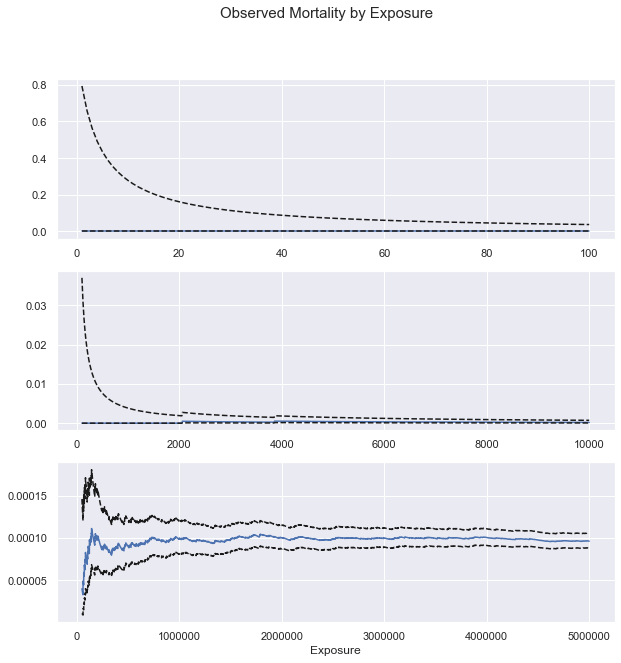

In [7]:
# エクスポージャの増加とともに信頼区間が収束する状況を可視化

fig = plt.figure(figsize=(10, 10))

# pd_CI.index[:100] = [1, 2, ... , 100]
ax1 = fig.add_subplot(311)
ax1.plot(pd_CI.index[:100], pd_CI['mort'].values[:100], '-', c='b')
ax1.plot(pd_CI.index[:100], pd_CI['LCL'].values[:100], '--', c='k')
ax1.plot(pd_CI.index[:100], pd_CI['UCL'].values[:100], '--', c='k')

# pd_CI10.index[9:1000] = [100, 110, ... , 10000]
ax2 = fig.add_subplot(312)
pd_CI10 = pd_CI[pd_CI.index % 10 == 0]
ax2.plot(pd_CI10.index[9:1000], pd_CI10['mort'].values[9:1000], '-', c='b')
ax2.plot(pd_CI10.index[9:1000], pd_CI10['LCL'].values[9:1000], '--', c='k')
ax2.plot(pd_CI10.index[9:1000], pd_CI10['UCL'].values[9:1000], '--', c='k')

# pd_CI100.index[99:] = [50000, 50500, ... , 5000000]
ax3 = fig.add_subplot(313)
pd_CI100 = pd_CI[pd_CI.index % 500 == 0]
ax3.plot(pd_CI100.index[99:], pd_CI100['mort'].values[99:], '-', c='b')
ax3.plot(pd_CI100.index[99:], pd_CI100['LCL'].values[99:], '--', c='k')
ax3.plot(pd_CI100.index[99:], pd_CI100['UCL'].values[99:], '--', c='k')
ax3.set_xlabel('Exposure')

fig.suptitle('Observed Mortality by Exposure', fontsize=15)

In [8]:
# b: Boolean value
i_LCL_more_than_0 = pd_CI[pd_CI['LCL'] > 0].index.min()
i_UCL_less_than_1 = pd_CI[pd_CI['UCL'] < 1].index.min()
i = max(i_LCL_more_than_0, i_UCL_less_than_1)
b_LCL = (pd_CI['LCL'].loc[i:] > 0.0001*(1 - 0.1))
b_UCL = (pd_CI['UCL'].loc[i:] < 0.0001*(1 + 0.1))
pd_CI.loc[i:][b_LCL & b_UCL].head()

,l,random,i,cum_l,cum_i,mort,LCL,UCL
4039208,1,0.791768,0,4039208,403,0.0001,0.00009,0.00011
4039209,1,0.126485,0,4039209,403,0.0001,0.00009,0.00011
4039210,1,0.126876,0,4039210,403,0.0001,0.00009,0.00011
4039211,1,0.429547,0,4039211,403,0.0001,0.00009,0.00011
4039212,1,0.917775,0,4039212,403,0.0001,0.00009,0.00011


## まとめ